$$\text{Part A: Moment of Inertia of Flywheel and Frictional Torque}$$

$\text{Radius of axle = 15.6 mm}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

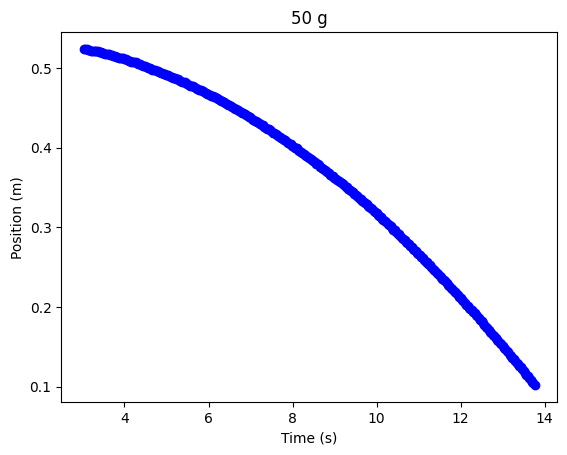

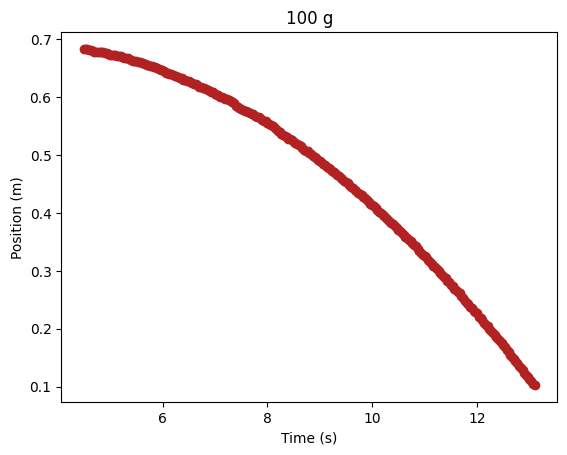

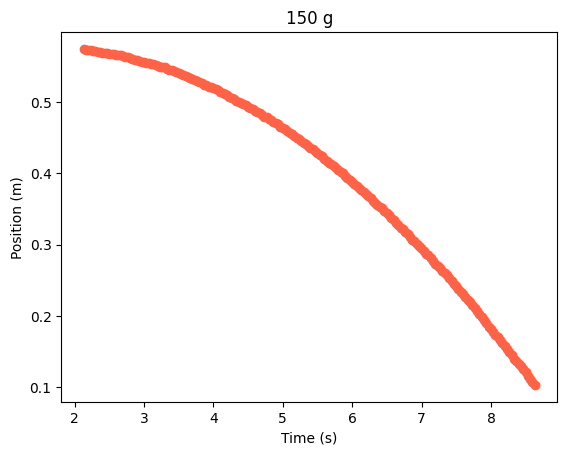

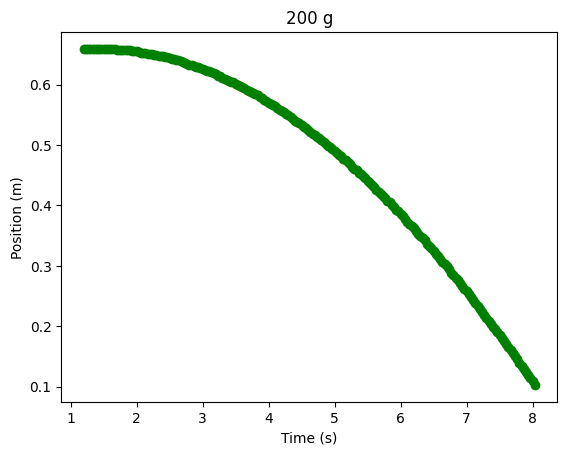

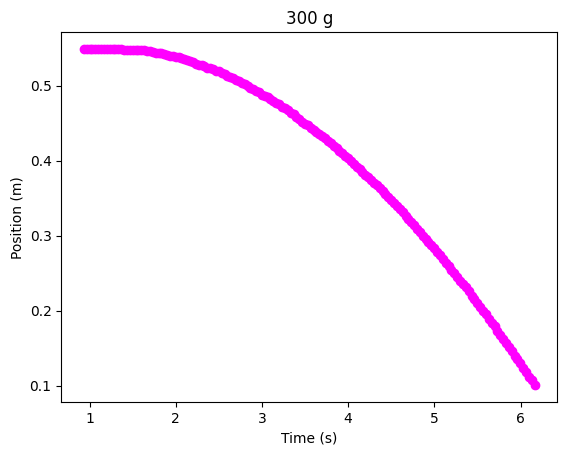

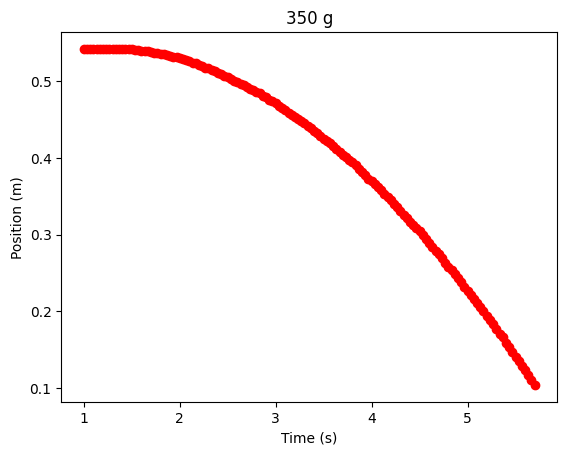

In [3]:
t50, y50 = np.loadtxt("./part a data/data part 50g.txt", unpack = True)
t100, y100 = np.loadtxt("./part a data/data part 100g.txt", unpack = True)
t150, y150 = np.loadtxt("./part a data/data part 150g.txt", unpack = True)
t200, y200 = np.loadtxt("./part a data/data part 200g.txt", unpack = True)
t300, y300 = np.loadtxt("./part a data/data part 300g.txt", unpack = True)
t350, y350 = np.loadtxt("./part a data/data part 350g.txt", unpack = True)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t50, y50, color = 'blue')
plt.title("50 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t100, y100, color = 'firebrick')
plt.title("100 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t150, y150, color = 'tomato')
plt.title("150 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t200, y200, color = 'green')
plt.title("200 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t300, y300, color = 'magenta')
plt.title("300 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("350 g")
plt.scatter(t350, y350, color = 'red')
plt.show()

In [4]:
fit50, var50 = np.polyfit(t50, y50, 2, cov = True)
fit100, var100 = np.polyfit(t100, y100, 2, cov = True)
fit150, var150 = np.polyfit(t150, y150, 2, cov = True)
fit200, var200 = np.polyfit(t200, y200, 2, cov = True)
fit300, var300 = np.polyfit(t300, y300, 2, cov = True)
fit350, var350 = np.polyfit(t350, y350, 2, cov = True)

In [5]:
a50 = fit50[0]
a100 = fit100[0]
a150 = fit150[0]
a200 = fit200[0]
a300 = fit300[0]
a350 = fit350[0]

b50 = fit50[1]
b100 = fit100[1]
b150 = fit150[1]
b200 = fit200[1]
b300 = fit300[1]
b350 = fit350[1]

c50 = fit50[2]
c100 = fit100[2]
c150 = fit150[2]
c200 = fit200[2]
c300 = fit300[2]
c350 = fit350[2]

In [6]:
a50_err = a50*np.sqrt(var50[0][0])
a100_err = a100*np.sqrt(var100[0][0])
a150_err = a150*np.sqrt(var150[0][0])
a200_err = a200*np.sqrt(var200[0][0])
a300_err = a300*np.sqrt(var300[0][0])
a350_err = a350*np.sqrt(var350[0][0])

In [7]:
acceleration_err = 2*np.abs(np.array([a50_err, a100_err, a150_err, a200_err, a300_err, a350_err]))
mass_error = 0.1/1000
print(acceleration_err)

[1.52559029e-08 1.11126559e-07 2.70489080e-07 6.13286094e-07
 1.45544775e-06 2.02908006e-06]


In [8]:
acceleration = 2*np.abs(np.array([a50, a100, a150, a200, a300, a350]))
mass = np.array([50, 101.9, 152.2, 202.8, 303.1, 352.7])/1000
fit_am, var_am = np.polyfit(mass, acceleration, 1, cov = True)
slope_am = fit_am[0]
intercept_am = fit_am[1]
slope_am_err = np.sqrt(var_am[0][0])
intercept_am_err = np.sqrt(var_am[1][1])
fiteq_am = slope_am*mass+intercept_am
print(slope_am, "\n", intercept_am, "\n", slope_am_err, "\n", intercept_am_err)

0.12102280906087953 
 -0.0003510127796206008 
 0.0023550058721219496 
 0.0005208088874996817


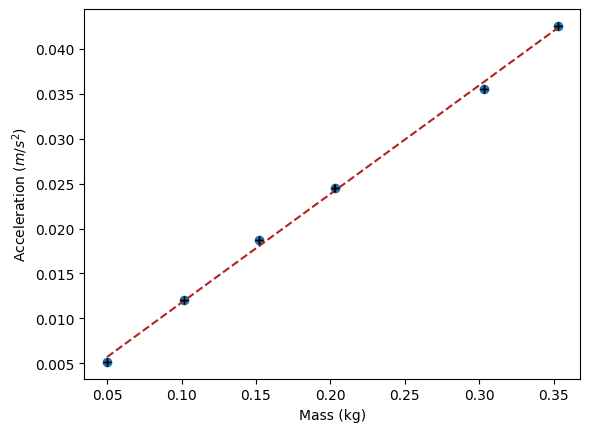

In [9]:
plt.scatter(mass, acceleration)
plt.plot(mass, fiteq_am, '--', color = 'firebrick')
plt.errorbar(mass, acceleration, xerr = mass_error, yerr = acceleration_err, ecolor = 'black', capsize = 3, ls = 'none')
plt.xlabel('Mass (kg)')
plt.ylabel(r'Acceleration ($m/s^2$)')
plt.show()

In [10]:
g = 9.807
r = 15.6/1000
moment_inertia = (g*r**2)/slope_am
torque_frictional = (intercept_am*moment_inertia)/r
print(moment_inertia, "\n", torque_frictional)

0.019720510030463965 
 -0.00044372763085442923


In [11]:
dr = 0.02/1000
err_moment_inertia = np.sqrt(slope_am_err**2+4*(dr/r)**2)
err_torque_frictional = np.sqrt(err_moment_inertia**2 + intercept_am_err**2 + (dr/r)**2)
print(moment_inertia*err_moment_inertia, "\n", torque_frictional*err_torque_frictional)

6.86564809015135e-05 
 -1.6623846928510681e-06


$$\text{Part C: Terminal velocity versus Magnetic Field}$$

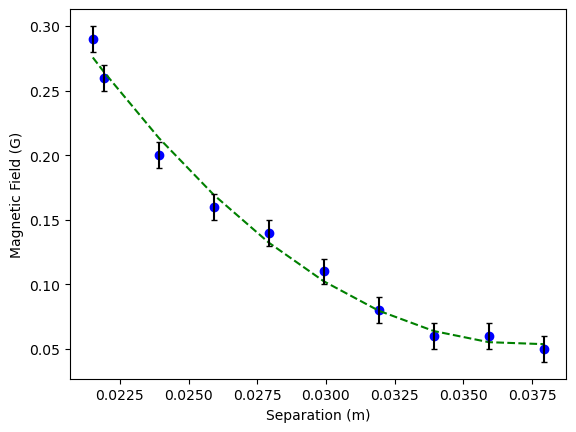

B(r) = 886.0322899111858 $r^2$ +-66.19161219455444 r +1.2896906319587713
0.9246497695512894


In [4]:
zero_err = 21.52/1000 #mm
seperation = np.array([0,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2])/500+zero_err
mag_field = np.array([0.29, 0.26, 0.2, 0.16, 0.14, 0.11, 0.08, 0.06, 0.06, 0.05])
fitB, cov_matrix_partC= np.polyfit(seperation, mag_field, 2, cov = True)
b = fitB[0]
c = fitB[1]
d = fitB[2]
fiteq = b*seperation**2 + c*seperation + d #+a*seperation**3 
b_err = np.sqrt(cov_matrix_partC[0][0])
c_err = np.sqrt(cov_matrix_partC[1][1])
d_err = np.sqrt(cov_matrix_partC[2][2])
plt.scatter(seperation, mag_field, color = 'blue')
plt.plot(seperation, fiteq, '--', color = 'green')
plt.xlabel('Separation (m)')
plt.ylabel("Magnetic Field (G)")
plt.errorbar(seperation, mag_field, yerr = 0.01, ecolor = 'black', capsize = 2.5, ls = 'none')
plt.show()
print(f"B(r) = {b}",r'$r^2$',f"+{c}",r'r',f"+{d}")

corr_matrix = np.corrcoef(seperation, fiteq)
corr = corr_matrix[0][1]
R_sq = corr**2
print(R_sq)

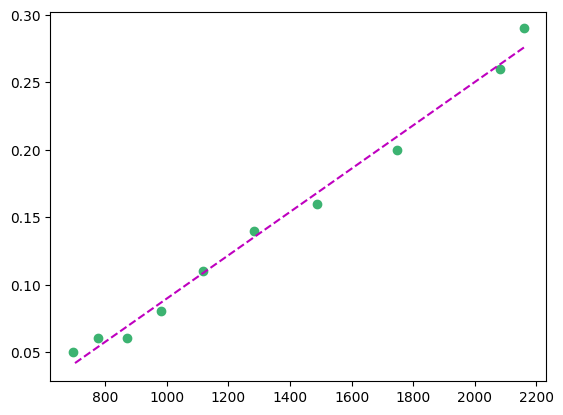

In [17]:
r_square = 1/(seperation**2)
plt.scatter(r_square, mag_field, color = 'mediumseagreen')
m_partB, c_partB = np.polyfit(r_square, mag_field, 1)
fitequation = m_partB*r_square+c_partB
plt.plot(r_square, fitequation, '--', c = 'm')
plt.show()

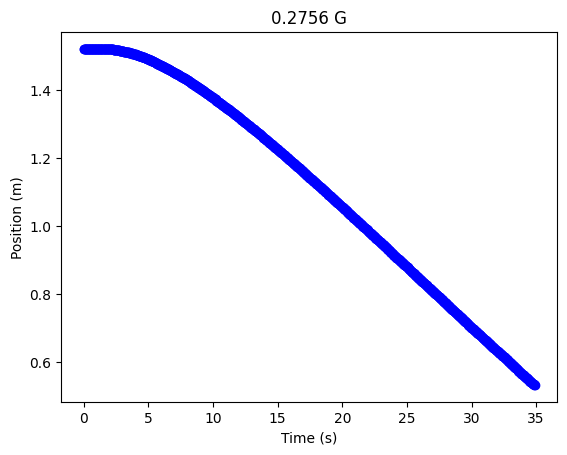

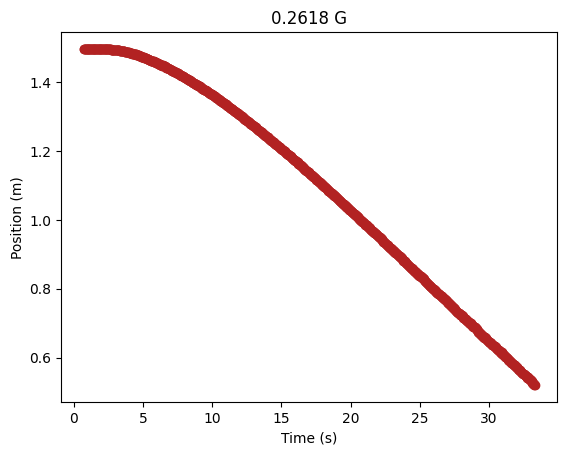

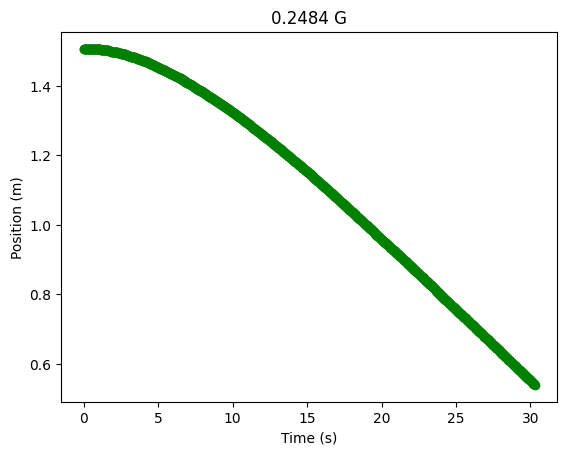

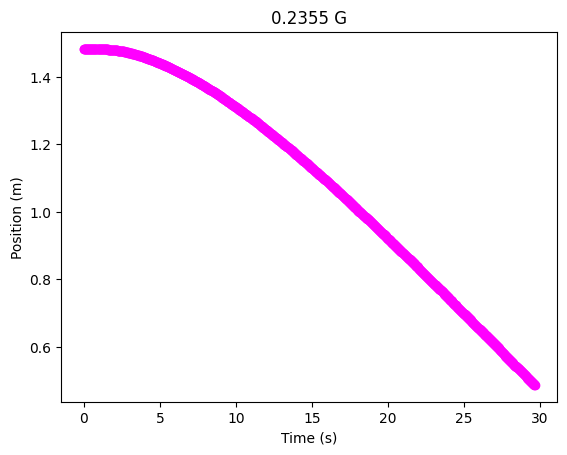

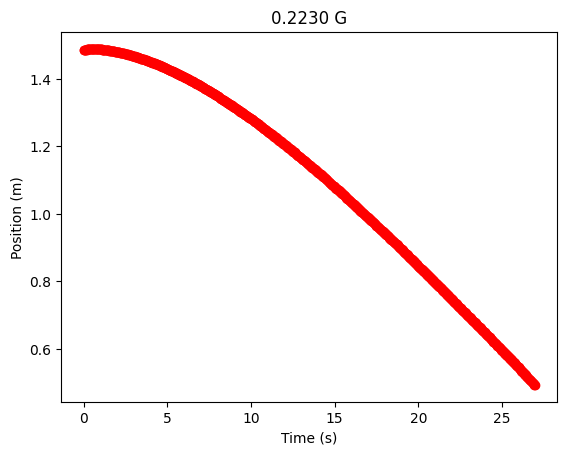

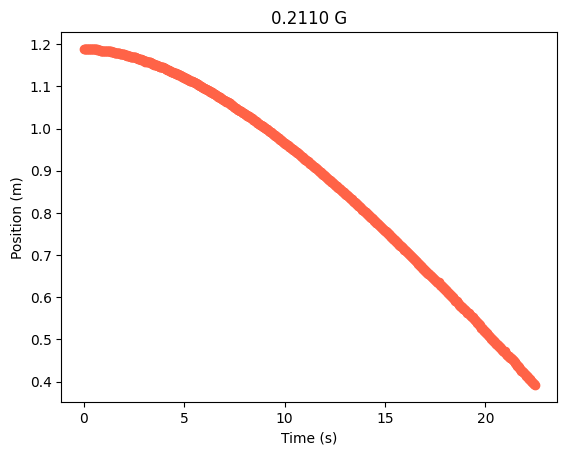

In [18]:
t50g, y50g = np.loadtxt("./part c data/0vt.txt", unpack = True, skiprows=2)
t70g, y70g = np.loadtxt("./part c data/0.5vt.txt", unpack = True, skiprows=2)
t100g, y100g = np.loadtxt("./part c data/1vt.txt", unpack = True, skiprows=2)
t101g, y101g = np.loadtxt("./part c data/1.5vt.txt", unpack = True, skiprows=2)
t119g, y119g = np.loadtxt("./part c data/2.5vt.txt", unpack = True, skiprows=2)
t150g, y150g = np.loadtxt("./part c data/3vt.txt", unpack = True, skiprows=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t50g, y50g, color = 'blue')
plt.title("0.2756 G")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t70g, y70g, color = 'firebrick')
plt.title("0.2618 G")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t100g, y100g, color = 'green')
plt.title("0.2484 G")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t101g, y101g, color = 'magenta')
plt.title("0.2355 G")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("0.2230 G")
plt.scatter(t119g, y119g, color = 'red')
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("0.2110 G")
plt.scatter(t150g, y150g, color = 'tomato')
plt.show()

In [19]:
fit50g, var50g = np.polyfit(t50g, y50g, 1, cov = True)
fit70g, var70g = np.polyfit(t70g, y70g, 1, cov = True)
fit100g, var100g = np.polyfit(t100g, y100g, 1, cov = True)
fit101g, var101g = np.polyfit(t101g, y101g, 1, cov = True)
fit119g, var119g = np.polyfit(t119g, y119g, 1, cov = True)
fit150g, var150g = np.polyfit(t150g, y150g, 1, cov = True)

m50g, c50g, m50g_err, c50g_err = fit50g[0], fit50g[1], np.sqrt(var50g[0][0]), np.sqrt(var50g[1][1])
m70g, c70g, m70g_err, c70g_err = fit70g[0], fit70g[1], np.sqrt(var70g[0][0]), np.sqrt(var70g[1][1])
m100g, c100g, m100g_err, c100g_err = fit100g[0], fit100g[1], np.sqrt(var100g[0][0]), np.sqrt(var100g[1][1])
m101g, c101g, m101g_err, c101g_err = fit101g[0], fit101g[1], np.sqrt(var101g[0][0]), np.sqrt(var101g[1][1])
m119g, c119g, m119g_err, c119g_err = fit119g[0], fit119g[1], np.sqrt(var119g[0][0]), np.sqrt(var119g[1][1])
m150g, c150g, m150g_err, c150g_err = fit150g[0], fit150g[1], np.sqrt(var150g[0][0]), np.sqrt(var150g[1][1])

partC_vt_err = np.array([m50g*m50g_err, m70g*m70g_err, m100g*m100g_err, m101g*m101g_err, m119g*m119g_err, m150g*m150g_err])
dm = 0.1/1000
print(partC_vt_err)

[-3.47363583e-06 -4.30607918e-06 -4.83561388e-06 -6.50395046e-06
 -8.13175562e-06 -8.44207856e-06]


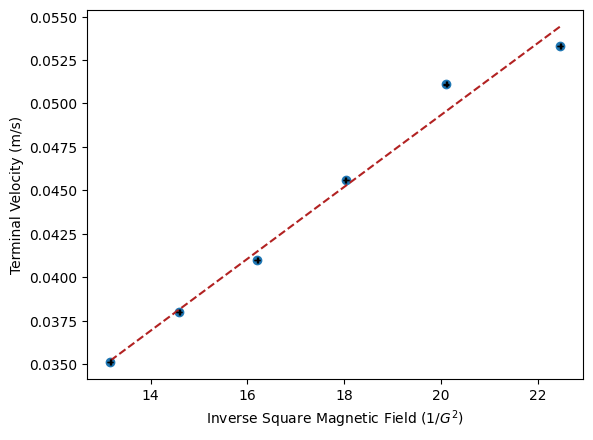

0.0020695386952332747 0.007946533722114311


In [20]:
seperations = np.array([0, 0.5, 1, 1.5, 2, 2.5])/1000 + zero_err
inverse_mag_field_square = 1/((b*seperations**2+c*seperations+d)**2)
vt = np.array([0.0351, 0.0380, 0.041, 0.0456, 0.0511, 0.0533])
plt.scatter(inverse_mag_field_square, vt)
fitpartC, varpartC = np.polyfit(inverse_mag_field_square, vt, 1, cov = True)
slope_partC, intercept_partC = fitpartC[0], fitpartC[1]
fiteqpartC = slope_partC*inverse_mag_field_square + intercept_partC
plt.plot(inverse_mag_field_square, fiteqpartC, '--', color = 'firebrick')
plt.xlabel(r'Inverse Square Magnetic Field ($1/G^2$)')
plt.ylabel('Terminal Velocity (m/s)')
plt.errorbar(inverse_mag_field_square, vt, xerr = 0.01, yerr = np.abs(partC_vt_err), ecolor = 'black', capsize = 2.5, ls = 'none')
plt.show()
print(slope_partC, intercept_partC)

In [47]:
'''print("Magnetic Field (G) & Terminal Velocity (m/s) \\\\\\hline")
for i in range(0,len(seperations)):
    print(np.round(1/np.sqrt(inverse_mag_field_square[i]),4), "&", vt[i], "\\\\\\hline")'''

partC_vt_err = np.abs(np.round(partC_vt_err*10**6,4))
print("Magnetic Field (G) & Terminal Velocity (m/s) & Error in Terminal Velocity ()")
for k in range(0,len(inverse_mag_field_square)):
    print(np.round(1/np.sqrt(inverse_mag_field_square[k]),4), "&", vt[k], "&",(partC_vt_err[k]) ,"\\\\\\hline")

Magnetic Field (G) & Terminal Velocity (m/s) & Error in Terminal Velocity ()
0.2756 & 0.0351 & 3.4736 \\\hline
0.2618 & 0.038 & 4.3061 \\\hline
0.2484 & 0.041 & 4.8356 \\\hline
0.2355 & 0.0456 & 6.504 \\\hline
0.223 & 0.0511 & 8.1318 \\\hline
0.211 & 0.0533 & 8.4421 \\\hline


In [44]:
torque_frictional_partC = None #gonna find frictional torque from here to match with part A

$$\text{Part B: Terminal Velocity versus varying mass}$$

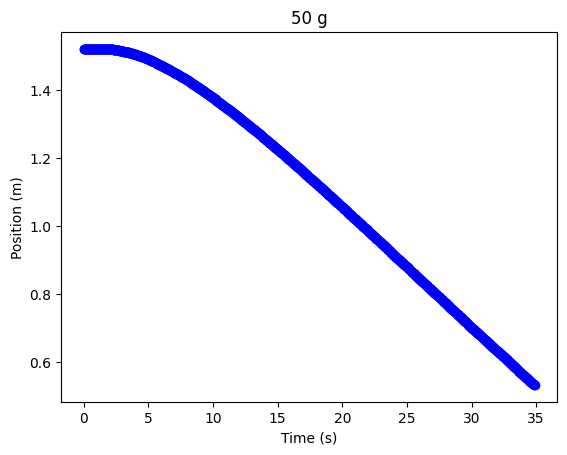

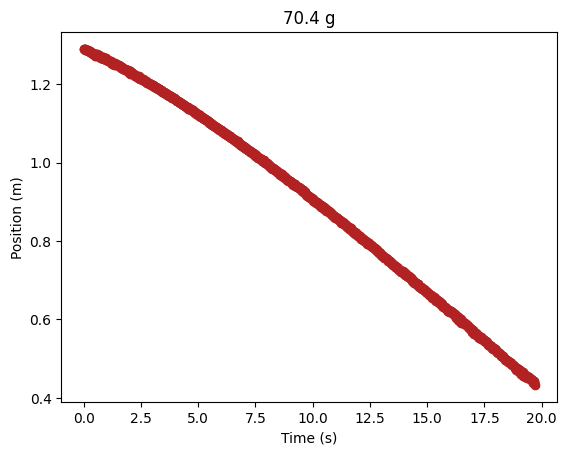

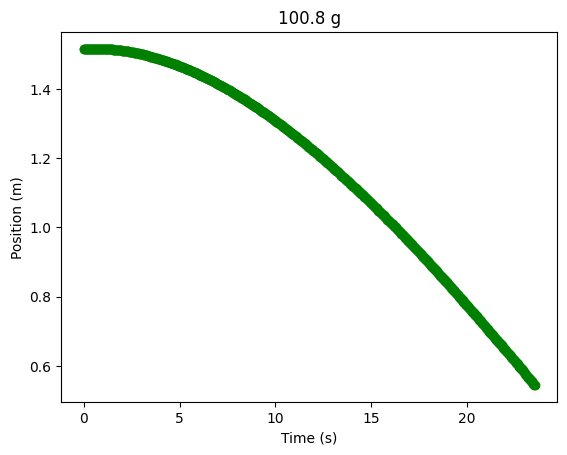

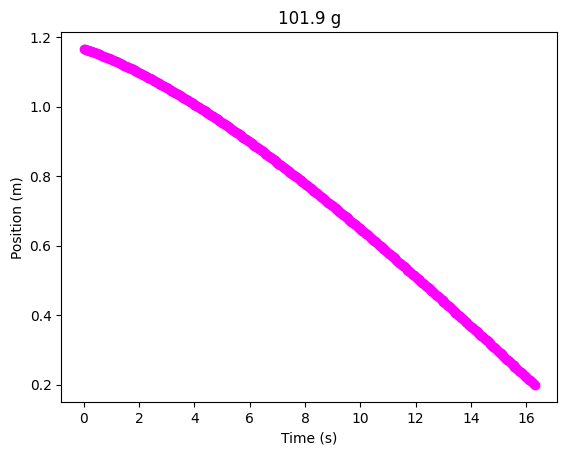

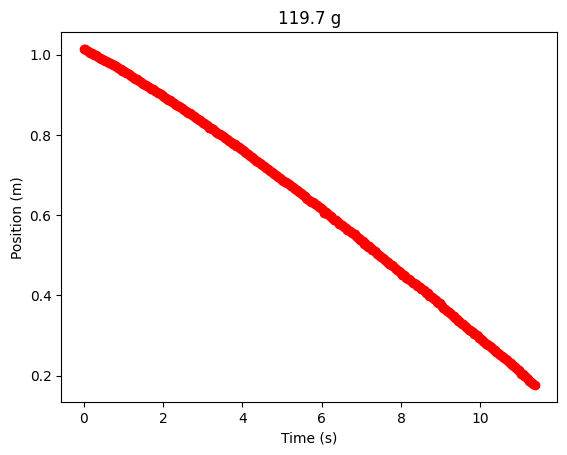

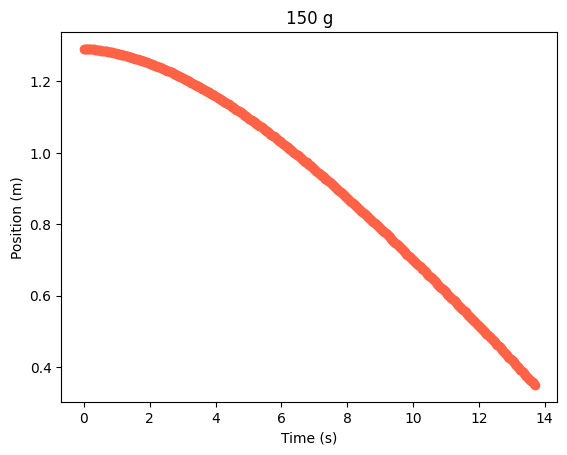

In [24]:
t50g, y50g = np.loadtxt("./part c data/0vt.txt", unpack = True, skiprows=2)
t70g, y70g = np.loadtxt("./part b data/70g.txt", unpack = True, skiprows=2)
t100g, y100g = np.loadtxt("./part b data/100.8g.txt", unpack = True, skiprows=2)
t101g, y101g = np.loadtxt("./part b data/101.9g.txt", unpack = True, skiprows=2)
t119g, y119g = np.loadtxt("./part b data/119.7g.txt", unpack = True, skiprows=2)
t150g, y150g = np.loadtxt("./part b data/150g.txt", unpack = True, skiprows=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t50g, y50g, color = 'blue')
plt.title("50 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t70g, y70g, color = 'firebrick')
plt.title("70.4 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t100g, y100g, color = 'green')
plt.title("100.8 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.scatter(t101g, y101g, color = 'magenta')
plt.title("101.9 g")
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("119.7 g")
plt.scatter(t119g, y119g, color = 'red')
plt.show()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("150 g")
plt.scatter(t150g, y150g, color = 'tomato')
plt.show()

In [25]:
fit50g, var50g = np.polyfit(t50g, y50g, 1, cov = True)
fit70g, var70g = np.polyfit(t70g, y70g, 1, cov = True)
fit100g, var100g = np.polyfit(t100g, y100g, 1, cov = True)
fit101g, var101g = np.polyfit(t101g, y101g, 1, cov = True)
fit119g, var119g = np.polyfit(t119g, y119g, 1, cov = True)
fit150g, var150g = np.polyfit(t150g, y150g, 1, cov = True)

m50g, c50g, m50g_err, c50g_err = fit50g[0], fit50g[1], np.sqrt(var50g[0][0]), np.sqrt(var50g[1][1])
m70g, c70g, m70g_err, c70g_err = fit70g[0], fit70g[1], np.sqrt(var70g[0][0]), np.sqrt(var70g[1][1])
m100g, c100g, m100g_err, c100g_err = fit100g[0], fit100g[1], np.sqrt(var100g[0][0]), np.sqrt(var100g[1][1])
m101g, c101g, m101g_err, c101g_err = fit101g[0], fit101g[1], np.sqrt(var101g[0][0]), np.sqrt(var101g[1][1])
m119g, c119g, m119g_err, c119g_err = fit119g[0], fit119g[1], np.sqrt(var119g[0][0]), np.sqrt(var119g[1][1])
m150g, c150g, m150g_err, c150g_err = fit150g[0], fit150g[1], np.sqrt(var150g[0][0]), np.sqrt(var150g[1][1])

partB_vt_err = np.array([m50g*m50g_err, m70g*m70g_err, m100g*m100g_err, m101g*m101g_err, m119g*m119g_err, m150g*m150g_err])
dm = 0.1/1000

print(r"Mass (kg) & Terminal Velocity")
print(partB_vt_err)

Mass (kg) & Terminal Velocity
[-3.47363583e-06 -3.47267139e-06 -1.44733027e-05 -1.49650445e-05
 -1.52852953e-05 -3.92003895e-05]


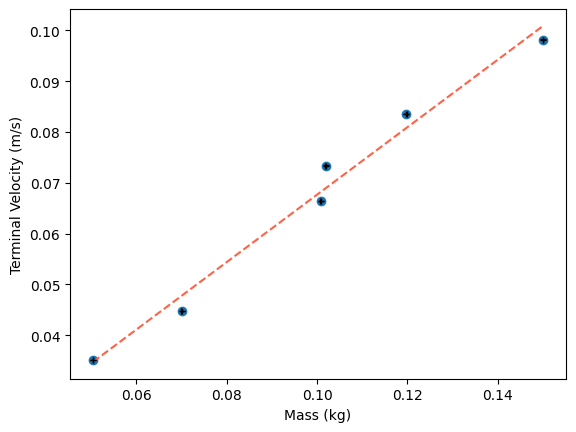

0.6641933035013599 0.0012610349473990425


In [26]:
masses = np.array([50.4, 70, 100.8, 101.9, 119.7, 150])/1000
v_terminal = np.array([0.0351, 0.0447, 0.0664, 0.0734, 0.0835, 0.0982])
plt.scatter(masses, v_terminal)
fitpartB = np.polyfit(masses, v_terminal, 1)
slope_partB, intercept_partB = fitpartB[0], fitpartB[1]
fiteqpartB = slope_partB*masses + intercept_partB
plt.plot(masses, fiteqpartB, '--', color = 'tomato')
plt.xlabel('Mass (kg)')
plt.ylabel("Terminal Velocity (m/s)")
plt.errorbar(masses, v_terminal, xerr = dm, yerr = np.abs(partB_vt_err), ecolor = 'black', capsize = 2.5, ls = 'none')
plt.show()
print(slope_partB, intercept_partB)

In [33]:
print("Mass (kg) & Terminal Velocity (m/s)")
for i in range(0,len(masses)):
    print(masses[i], "&", v_terminal[i], "\\\\\\hline")

partB_vt_err = np.abs(np.round(partB_vt_err*10**6,4))
print("Mass (kg) & Terminal Velocity (m/s) & Error in Terminal Velocity ()")
for k in range(0,len(masses)):
    print(masses[k], "&", v_terminal[k], "&",(partB_vt_err[k]) ,"\\\\\\hline")

Mass (kg) & Terminal Velocity (m/s)
0.0504 & 0.0351 \\\hline
0.07 & 0.0447 \\\hline
0.1008 & 0.0664 \\\hline
0.1019 & 0.0734 \\\hline
0.1197 & 0.0835 \\\hline
0.15 & 0.0982 \\\hline
Mass (kg) & Terminal Velocity (m/s) & Error in Terminal Velocity ()
0.0504 & 0.0351 & 3.4736 \\\hline
0.07 & 0.0447 & 3.4727 \\\hline
0.1008 & 0.0664 & 14.4733 \\\hline
0.1019 & 0.0734 & 14.965 \\\hline
0.1197 & 0.0835 & 15.2853 \\\hline
0.15 & 0.0982 & 39.2004 \\\hline


In [76]:
#Finding the value of C in the equation for terminal velocity. 
C = ((g*r**2)/slope_partB)*(masses - (torque_frictional)/(g*r))
print(C)

[0.00019152 0.00026195 0.00037262 0.00037658 0.00044054 0.00054941]


In [80]:
print("Mass (kg) & Average Factor C \\\\\\hline")
for j in range(0, len(masses)):
    print(masses[j], "&", np.round(C[j],5), "\\\\\\hline")

Mass (kg) & Average Factor C \\\hline
0.0504 & 0.00019 \\\hline
0.07 & 0.00026 \\\hline
0.1008 & 0.00037 \\\hline
0.1019 & 0.00038 \\\hline
0.1197 & 0.00044 \\\hline
0.15 & 0.00055 \\\hline
